## AIFFEL_Project
### 나랑 닮은 연예인을 찾아보자

### Step 1. 사진 모으기
1. 내 사진 찍기
    - 내 사진 2장 이상 포함합시다.
    - 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해보기(닮음을 확일)
    - 내 사진들끼리의 거리가 멀게 나온다면 생각해보기   
<br/>   
2. 비교할 연예인 사진 모으기
    - 많이 모을 수록 나와 더 닮은 연예인을 찾을 가능성 높아짐
    - 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법

### Step 1-1. 내 사진들끼리 임베딩 벡터 구하기
- 닮음을 확인

**Sample Image 내 얼굴 영역 가져오기 및 자르기**

[(206, 740, 527, 419)]


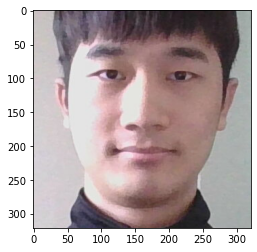

In [63]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/tae1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [64]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

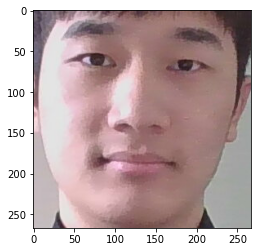

In [65]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/tae2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [66]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/project'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['정지훈.jpg', '양세형.jpg', '조정석.jpg', '손흥민.jpg', 'tae3.jpg', '차은우.jpg', '황정민.jpg', '양세찬.jpeg', '태양.jpg', '강동원.jpg', '존박.jpg', 'tae2.jpg', 'tae1.jpg', 'tae4.jpg', 'tae1_save.jpg']


- ```tae1.jpg```에 포함된 얼굴 영역의 임베딩 벡터 구해보기
- 이미지 파일의 얼굴 영역을 가져오는 함수: **get_gropped_face()**
- ```Face Recognition``` 패키지에서 제공하는 얼굴 임베디 벡터 구하기 함수
    - **face_recognition.face_encodings()**

In [67]:
image_file = os.path.join(dir_path, 'tae1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.02879989,  0.09207778,  0.05263716, -0.02685249, -0.08518519,
        -0.02070816, -0.09421612, -0.1196683 ,  0.07631793, -0.07039463,
         0.20621897, -0.01207135, -0.14408383, -0.16125827, -0.02266464,
         0.14338374, -0.13305405, -0.15311387, -0.0567717 , -0.05752153,
         0.04113479,  0.05579228,  0.0615799 , -0.03186376, -0.10116541,
        -0.35942706, -0.10221453, -0.07573119,  0.07363571, -0.04936641,
        -0.05398794,  0.04673674, -0.16750318, -0.03001008,  0.04920509,
         0.02875813,  0.01511152, -0.05906563,  0.1622548 , -0.00280428,
        -0.20006837,  0.05098379,  0.07342724,  0.24906012,  0.22434436,
        -0.00200852,  0.06099633, -0.12218109,  0.11093376, -0.06273437,
         0.0339455 ,  0.13315615,  0.06917302,  0.04327062,  0.04236205,
        -0.11501437,  0.0087825 ,  0.12144899, -0.09077422,  0.01725222,
         0.05471236, -0.04438275, -0.05076385, -0.09181229,  0.24515808,
         0.02463967, -0.10523131, -0.22507435,  0.1

**딕셔너리의 각 엘리먼트는 ```사람 이름: 임베딩 벡터```로 지정**

In [68]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)    # dir_path 대신 path으로 저장되어 있었음
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

**```get_face_embedding_dict()``` 함수 확인**

In [69]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['tae4']

array([-0.04662994,  0.07037556,  0.03442519, -0.02325461, -0.07417671,
       -0.03256765, -0.09465103, -0.13843223,  0.07532828, -0.06457771,
        0.20623684, -0.02789293, -0.14768139, -0.17732204, -0.03530989,
        0.15080383, -0.14282945, -0.15715723, -0.03489689, -0.04834184,
        0.0493163 ,  0.00956161,  0.06363586,  0.01115154, -0.1001685 ,
       -0.36810088, -0.08386912, -0.07071512,  0.07321361, -0.07383692,
       -0.06884991,  0.08256955, -0.17568819, -0.0357679 ,  0.04049421,
        0.05121479,  0.02269044, -0.062351  ,  0.15293957, -0.0175027 ,
       -0.19437958,  0.07077995,  0.04994056,  0.25626612,  0.22770391,
       -0.00309006,  0.07369575, -0.11113147,  0.13102485, -0.06239861,
        0.03391135,  0.12707497,  0.06818578,  0.02146669,  0.03782976,
       -0.12161867, -0.00137968,  0.10949244, -0.09166119,  0.03368731,
        0.05594873, -0.05554462, -0.03844838, -0.11108994,  0.21462882,
        0.02884343, -0.08923647, -0.2356398 ,  0.14761205, -0.11

**내 사진끼리 임베딩간의 거리 확보 확인**

In [70]:
import numpy as np

tae1 = np.array([-0.02879989,  0.09207778,  0.05263716, -0.02685249, -0.08518519,
       -0.02070816, -0.09421612, -0.1196683 ,  0.07631793, -0.07039463,
        0.20621897, -0.01207135, -0.14408383, -0.16125827, -0.02266464,
        0.14338374, -0.13305405, -0.15311387, -0.0567717 , -0.05752153,
        0.04113479,  0.05579228,  0.0615799 , -0.03186376, -0.10116541,
       -0.35942706, -0.10221453, -0.07573119,  0.07363571, -0.04936641,
       -0.05398794,  0.04673674, -0.16750318, -0.03001008,  0.04920509,
        0.02875813,  0.01511152, -0.05906563,  0.1622548 , -0.00280428,
       -0.20006837,  0.05098379,  0.07342724,  0.24906012,  0.22434436,
       -0.00200852,  0.06099633, -0.12218109,  0.11093376, -0.06273437,
        0.0339455 ,  0.13315615,  0.06917302,  0.04327062,  0.04236205,
       -0.11501437,  0.0087825 ,  0.12144899, -0.09077422,  0.01725222,
        0.05471236, -0.04438275, -0.05076385, -0.09181229,  0.24515808,
        0.02463967, -0.10523131, -0.22507435,  0.12797335, -0.10628229,
       -0.0983264 ,  0.03580602, -0.20214497, -0.10425828, -0.31968248,
        0.03399684,  0.38272867,  0.08835001, -0.21920609,  0.10847057,
       -0.02295399,  0.02474769,  0.13271156,  0.17768019, -0.05938781,
        0.05930026, -0.07617179, -0.00062461,  0.19707586, -0.03162882,
       -0.08143847,  0.15968972, -0.02319099,  0.1265159 ,  0.05010235,
       -0.01340623, -0.06495927,  0.0408631 , -0.14544465, -0.01307528,
        0.0267284 , -0.03751468,  0.01449115,  0.15244348, -0.08100384,
        0.11875125,  0.01553139,  0.08727717,  0.01713885,  0.03697525,
       -0.05004209, -0.06773368,  0.08871084, -0.22392933,  0.20252416,
        0.1573499 ,  0.10240679,  0.10381213,  0.1561283 ,  0.09697717,
       -0.01112744,  0.04197627, -0.19748989,  0.0091387 ,  0.0682456 ,
       -0.0489093 ,  0.08647738,  0.04177833])

tae2 = np.array([-4.19173315e-02,  7.22520649e-02,  2.52779797e-02, -4.13397253e-02,
       -6.46120459e-02, -3.16975154e-02, -9.54725444e-02, -1.40924513e-01,
        9.16745141e-02, -6.15824126e-02,  2.16182962e-01, -9.45551507e-03,
       -1.57234713e-01, -1.91173360e-01, -4.12446745e-02,  1.41860589e-01,
       -1.50645435e-01, -1.64075002e-01, -3.69360074e-02, -4.76019457e-02,
        4.77622710e-02,  1.45863676e-02,  7.01403394e-02, -8.41864198e-03,
       -1.07563816e-01, -3.65259647e-01, -7.77755454e-02, -8.05098191e-02,
        4.67878804e-02, -4.85294908e-02, -5.59182614e-02,  9.55518484e-02,
       -1.91363886e-01, -3.63283753e-02,  4.35635857e-02,  5.17261326e-02,
        3.53142768e-02, -5.12913615e-02,  1.60039991e-01, -8.53650272e-06,
       -1.87508911e-01,  7.16159344e-02,  3.88612524e-02,  2.45163739e-01,
        2.28784189e-01,  2.01466354e-03,  7.19683319e-02, -1.44268364e-01,
        1.13168858e-01, -4.93605621e-02,  4.46476154e-02,  1.42180666e-01,
        8.12109411e-02,  5.85232116e-03,  4.63028178e-02, -1.24397039e-01,
        2.07412075e-02,  7.06849322e-02, -8.57658237e-02, -6.16682926e-04,
        6.36027306e-02, -3.50233614e-02, -4.88209277e-02, -1.14574783e-01,
        2.23254502e-01,  1.31666837e-02, -8.76995698e-02, -2.17548341e-01,
        1.54095069e-01, -1.02297045e-01, -1.03739537e-01,  2.45837197e-02,
       -1.96077481e-01, -1.18417732e-01, -3.13389689e-01,  2.73003615e-02,
        3.38475227e-01,  1.04687780e-01, -2.50857800e-01,  1.30012736e-01,
       -1.78780500e-02,  2.42832378e-02,  1.38958260e-01,  1.82486326e-01,
       -4.38641384e-02,  6.69771284e-02, -7.96941370e-02, -2.59131175e-02,
        1.90431446e-01, -5.21201454e-03, -9.56023559e-02,  1.70788988e-01,
       -1.56672336e-02,  1.01003662e-01,  7.76047111e-02, -3.88015658e-02,
       -5.21407798e-02,  6.67239949e-02, -1.54136404e-01, -2.29807105e-03,
        1.96368024e-02, -3.61360461e-02, -3.57049238e-03,  1.37178481e-01,
       -8.25299919e-02,  1.05486155e-01, -7.05605466e-03,  9.10157263e-02,
        1.26694981e-02,  2.54117996e-02, -5.75715452e-02, -6.87381178e-02,
        7.31333420e-02, -2.46400833e-01,  2.04763353e-01,  1.55218154e-01,
        1.26550496e-01,  1.09042980e-01,  1.48318052e-01,  1.03509337e-01,
        2.65406352e-03,  5.17918840e-02, -2.08272234e-01, -7.30284816e-03,
        7.70785362e-02, -5.51904067e-02,  8.62142965e-02,  5.14410734e-02])

tae3 = np.array([-5.36019728e-02,  5.10438383e-02,  2.25643516e-02, -5.81939407e-02,
       -7.63593912e-02, -4.15864550e-02, -6.53906614e-02, -1.17890313e-01,
        1.13347568e-01, -7.80368894e-02,  2.40076885e-01, -9.22996178e-03,
       -1.52443737e-01, -1.70821965e-01, -5.23479171e-02,  1.48560196e-01,
       -1.27433866e-01, -1.36398911e-01, -6.04007393e-02, -4.42354716e-02,
        5.98933510e-02,  5.23563288e-02,  6.39735162e-02, -1.50884707e-02,
       -1.01974055e-01, -3.56233925e-01, -7.86172226e-02, -7.05961287e-02,
        4.08089459e-02, -5.88742718e-02, -3.93121205e-02,  8.76180530e-02,
       -1.69214934e-01, -3.42866406e-02,  5.50174937e-02,  5.13549149e-02,
        9.19650123e-03, -4.32277918e-02,  1.68572769e-01,  5.66034112e-03,
       -2.30576679e-01,  3.09233498e-02,  7.36912489e-02,  2.47409075e-01,
        2.09503233e-01,  1.83364726e-04,  6.05917200e-02, -1.67769462e-01,
        1.21608712e-01, -5.66031300e-02,  4.05343920e-02,  1.32811129e-01,
        7.29178861e-02,  1.40014272e-02,  4.52846885e-02, -9.64275226e-02,
        8.59642494e-03,  1.05321899e-01, -8.15916508e-02, -1.73613168e-02,
        6.11408055e-02, -3.76272574e-02, -6.12008646e-02, -1.03994898e-01,
        2.19508633e-01,  1.14777209e-02, -9.62749124e-02, -2.15423092e-01,
        1.58321843e-01, -1.23056792e-01, -1.18211940e-01,  5.01620993e-02,
       -1.88320622e-01, -1.29402459e-01, -3.12137127e-01,  9.07292776e-03,
        3.56353223e-01,  8.18342566e-02, -2.11495817e-01,  1.25395283e-01,
       -2.69906893e-02,  1.23786042e-02,  1.37312099e-01,  1.97274938e-01,
       -4.20005843e-02,  8.40520933e-02, -6.78246021e-02, -2.22711526e-02,
        2.13618279e-01, -4.10108604e-02, -6.61283880e-02,  1.72239840e-01,
        1.11706741e-03,  9.59610492e-02,  6.21749796e-02, -3.05584166e-02,
       -6.02725670e-02,  5.39981984e-02, -1.56692758e-01, -3.16709690e-02,
        3.11632007e-02, -2.54549682e-02,  1.26797501e-02,  1.40533626e-01,
       -1.09392308e-01,  1.20355196e-01,  1.07439719e-02,  7.37372413e-02,
        4.51661199e-02,  2.09301021e-02, -2.31669787e-02, -1.02727078e-01,
        6.65931329e-02, -2.08171248e-01,  1.82309598e-01,  1.43588513e-01,
        1.28396913e-01,  1.11699037e-01,  1.50596827e-01,  1.04746215e-01,
        9.71189700e-04,  4.13451828e-02, -2.02857792e-01,  1.64277740e-02,
        7.68522993e-02, -4.16486450e-02,  8.12381506e-02,  2.19553392e-02])

tae4 = np.array([-0.04662994,  0.07037556,  0.03442519, -0.02325461, -0.07417671,
       -0.03256765, -0.09465103, -0.13843223,  0.07532828, -0.06457771,
        0.20623684, -0.02789293, -0.14768139, -0.17732204, -0.03530989,
        0.15080383, -0.14282945, -0.15715723, -0.03489689, -0.04834184,
        0.0493163 ,  0.00956161,  0.06363586,  0.01115154, -0.1001685 ,
       -0.36810088, -0.08386912, -0.07071512,  0.07321361, -0.07383692,
       -0.06884991,  0.08256955, -0.17568819, -0.0357679 ,  0.04049421,
        0.05121479,  0.02269044, -0.062351  ,  0.15293957, -0.0175027 ,
       -0.19437958,  0.07077995,  0.04994056,  0.25626612,  0.22770391,
       -0.00309006,  0.07369575, -0.11113147,  0.13102485, -0.06239861,
        0.03391135,  0.12707497,  0.06818578,  0.02146669,  0.03782976,
       -0.12161867, -0.00137968,  0.10949244, -0.09166119,  0.03368731,
        0.05594873, -0.05554462, -0.03844838, -0.11108994,  0.21462882,
        0.02884343, -0.08923647, -0.2356398 ,  0.14761205, -0.11516546,
       -0.09282916,  0.02208747, -0.19604246, -0.11330666, -0.31109205,
        0.02542849,  0.33303645,  0.09950139, -0.22717978,  0.12511045,
       -0.00812222,  0.03273846,  0.12491933,  0.18071225, -0.02655188,
        0.06043725, -0.08433629, -0.02680267,  0.19304743, -0.00716361,
       -0.08981311,  0.16261785, -0.02510334,  0.09714833,  0.06806002,
       -0.0227428 , -0.07779354,  0.05414183, -0.15290621, -0.01037235,
       -0.00234831, -0.04020912,  0.00642606,  0.13287586, -0.07408272,
        0.13326901, -0.00772941,  0.11281589,  0.00431296,  0.04258514,
       -0.06116749, -0.0559107 ,  0.07045826, -0.24110888,  0.21476759,
        0.16324763,  0.14075395,  0.10508291,  0.13623342,  0.09025045,
        0.01129268,  0.05798607, -0.19007482, -0.00691073,  0.07037947,
       -0.06025996,  0.07465233,  0.0500022 ])

print("SUN")

SUN


In [71]:
distances = np.linalg.norm([tae1, tae2, tae3] - tae4, axis=1, ord=2)
print("Distance between tae1 and tae4: {}".format(distances[0]))
print("Distance between tae2 and tae4: {}".format(distances[1]))
print("Distance between tae3 and tae4: {}".format(distances[2]))

Distance between tae1 and tae4: 0.1772754095298234
Distance between tae2 and tae4: 0.13870883918913296
Distance between tae3 and tae4: 0.229351528333218


- tae1, tae2, tae3 - tae4 임베딩 벡터 거리 비교
- 그 중 ```tae2 - tae4``` 가 제일 가깝게 나옴

---

### Step 2. 얼굴 영역 자르기

In [72]:
from PIL import Image
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

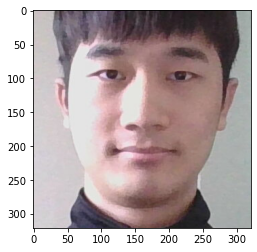

In [73]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/tae1.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

pillow_image = Image.fromarray(cropped_face)
pillow_image.save('/home/aiffel0042/aiffel/face_embedding/project/tae1_save.jpg')

---

### Step 3. 얼굴 영역의 임베딩 추출하기
- ```face_recognition```을 사용해서 이미지 부르기
- 임베딩 추출하기
- 다른 사람의 임베딩은 구분할 수 있도록 따로 저장
    - ```def get_face_embedding(face) :``` 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
    - ```def get_face_embedding_dict(dir_path) :``` 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [74]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/project'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['정지훈.jpg', '양세형.jpg', '조정석.jpg', '손흥민.jpg', 'tae3.jpg', '차은우.jpg', '황정민.jpg', '양세찬.jpeg', '태양.jpg', '강동원.jpg', '존박.jpg', 'tae2.jpg', 'tae1.jpg', 'tae4.jpg', 'tae1_save.jpg']


In [75]:
image_file = os.path.join(dir_path, 'tae1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.02879989,  0.09207778,  0.05263716, -0.02685249, -0.08518519,
        -0.02070816, -0.09421612, -0.1196683 ,  0.07631793, -0.07039463,
         0.20621897, -0.01207135, -0.14408383, -0.16125827, -0.02266464,
         0.14338374, -0.13305405, -0.15311387, -0.0567717 , -0.05752153,
         0.04113479,  0.05579228,  0.0615799 , -0.03186376, -0.10116541,
        -0.35942706, -0.10221453, -0.07573119,  0.07363571, -0.04936641,
        -0.05398794,  0.04673674, -0.16750318, -0.03001008,  0.04920509,
         0.02875813,  0.01511152, -0.05906563,  0.1622548 , -0.00280428,
        -0.20006837,  0.05098379,  0.07342724,  0.24906012,  0.22434436,
        -0.00200852,  0.06099633, -0.12218109,  0.11093376, -0.06273437,
         0.0339455 ,  0.13315615,  0.06917302,  0.04327062,  0.04236205,
        -0.11501437,  0.0087825 ,  0.12144899, -0.09077422,  0.01725222,
         0.05471236, -0.04438275, -0.05076385, -0.09181229,  0.24515808,
         0.02463967, -0.10523131, -0.22507435,  0.1

**Dictionary의 각 element는 ```이름: 임베딩 벡터```로 지정**

In [76]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)    # dir_path 대신 path으로 저장되어 있었음
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

```get_face_embedding_dict()``` 함수 확인

In [77]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['정지훈']

array([-1.13879979e-01,  9.82408226e-02,  7.38623813e-02, -4.09745499e-02,
       -1.36130482e-01, -5.90588450e-02, -8.49664807e-02, -1.43869326e-01,
        6.57043606e-02, -1.11197300e-01,  1.84169635e-01, -4.13484052e-02,
       -2.11394161e-01, -1.14744790e-01, -4.35467809e-02,  1.83934718e-01,
       -1.61314189e-01, -1.81287095e-01,  3.40129249e-03, -4.20887768e-02,
        8.39363262e-02,  4.86924015e-02,  4.82198037e-02,  8.11964795e-02,
       -2.13005111e-01, -3.22370082e-01, -8.30142349e-02, -5.41466251e-02,
       -3.57604027e-02, -6.46373555e-02, -1.11056164e-01,  2.67521590e-02,
       -2.07135901e-01, -1.47875678e-02,  1.36192683e-02,  1.04576454e-01,
        1.76920108e-02, -8.20718855e-02,  1.44853592e-01,  2.93074287e-02,
       -2.64999688e-01,  1.08155727e-01,  2.65580062e-02,  2.42170826e-01,
        2.69411266e-01,  2.12539220e-03,  4.13244218e-02, -1.53318748e-01,
        1.26976565e-01, -1.49180025e-01,  9.48220342e-02,  1.21667370e-01,
        6.43319860e-02, -

---

### Step 4. 모은 연예인들과 비교하기
- 모은 연예인 사진들과 자신의 얼굴 비교
- 추출한 임베팅 벡터들 간의 거리를 비교
- 거리 간격의 값이 가장 작은 연예인 찾기

- 우리가 가지고 있는 이미지 얼굴 임베딩 모두 구함
- 임베딩 벡터간의 거리를 계산하는 함수 구현
    - np.linalg.norm 활용
    - 만들 함수는 인자로 파일명의 사람 이름 2개를 받음
    - 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태    
<br/>   
- ```def get_distance(name1, name2)```
- 두 이미지 사이의 임베딩 벡터 거리를 구하는 함수

In [78]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('tae1', '정지훈')

0.5348975709761171

In [79]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, 
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('tae1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('tae1') 라고 호출할 때 
# 정지훈와 tae1 사이의 임베딩 벡터 거리를 계산합니다.

- 이미 모든 이미지 파일에 대한 얼굴 임베딩 딕셔너리를 가지고 있음
- 이 딕셔너리를 오름차순으로 정렬
- 정렬 기준은 정지훈과의 임베딩 벡터 거리 함수로 할 것
- lamda 함수가 정렬 key로 활용

In [80]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('tae1',
  array([-0.02879989,  0.09207778,  0.05263716, -0.02685249, -0.08518519,
         -0.02070816, -0.09421612, -0.1196683 ,  0.07631793, -0.07039463,
          0.20621897, -0.01207135, -0.14408383, -0.16125827, -0.02266464,
          0.14338374, -0.13305405, -0.15311387, -0.0567717 , -0.05752153,
          0.04113479,  0.05579228,  0.0615799 , -0.03186376, -0.10116541,
         -0.35942706, -0.10221453, -0.07573119,  0.07363571, -0.04936641,
         -0.05398794,  0.04673674, -0.16750318, -0.03001008,  0.04920509,
          0.02875813,  0.01511152, -0.05906563,  0.1622548 , -0.00280428,
         -0.20006837,  0.05098379,  0.07342724,  0.24906012,  0.22434436,
         -0.00200852,  0.06099633, -0.12218109,  0.11093376, -0.06273437,
          0.0339455 ,  0.13315615,  0.06917302,  0.04327062,  0.04236205,
         -0.11501437,  0.0087825 ,  0.12144899, -0.09077422,  0.01725222,
          0.05471236, -0.04438275, -0.05076385, -0.09181229,  0.24515808,
          0.02463967, -0.105

In [83]:
def get_nearest_face(name, top=14):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [84]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('tae1')

순위 1 : 이름(tae1_save), 거리(0.1171288522774807)
순위 2 : 이름(tae4), 거리(0.17727540280545598)
순위 3 : 이름(tae2), 거리(0.19046143587788725)
순위 4 : 이름(tae3), 거리(0.19989315800141585)
순위 5 : 이름(손흥민), 거리(0.4611106462009037)
순위 6 : 이름(양세형), 거리(0.5012611361656387)
순위 7 : 이름(정지훈), 거리(0.5348975709761171)
순위 8 : 이름(조정석), 거리(0.5432784607210895)
순위 9 : 이름(존박), 거리(0.5562629265270946)
순위 10 : 이름(강동원), 거리(0.5704073201504231)
순위 11 : 이름(태양), 거리(0.5715045717374193)
순위 12 : 이름(양세찬), 거리(0.5753650580660079)
순위 13 : 이름(차은우), 거리(0.5960195083770563)
순위 14 : 이름(황정민), 거리(0.6671169784667221)


----

### 정리
- 평소에 닮았다 하는 연예인, 닮고 싶은 연예은, 타 홈페이지에 AI가 닮았다고 한 연예인 3 종류의 사진을 모음
- 순위 1~4는 모두 내 자신의 사진임으로 순위에서 배제
- 5위부터 손흥민, 양세형, 정지훈, 조정석 ... 등 나옴
- 임베딩 벡터 0.4와 0.5의 닮은 기능 차이가 심한 것으로 추측    
- **임베딩 벡터 거리 0.5 이내 닮은 연예인 : 손흥민**
    
<br/>
**타 홈페이지 AI 결과**    

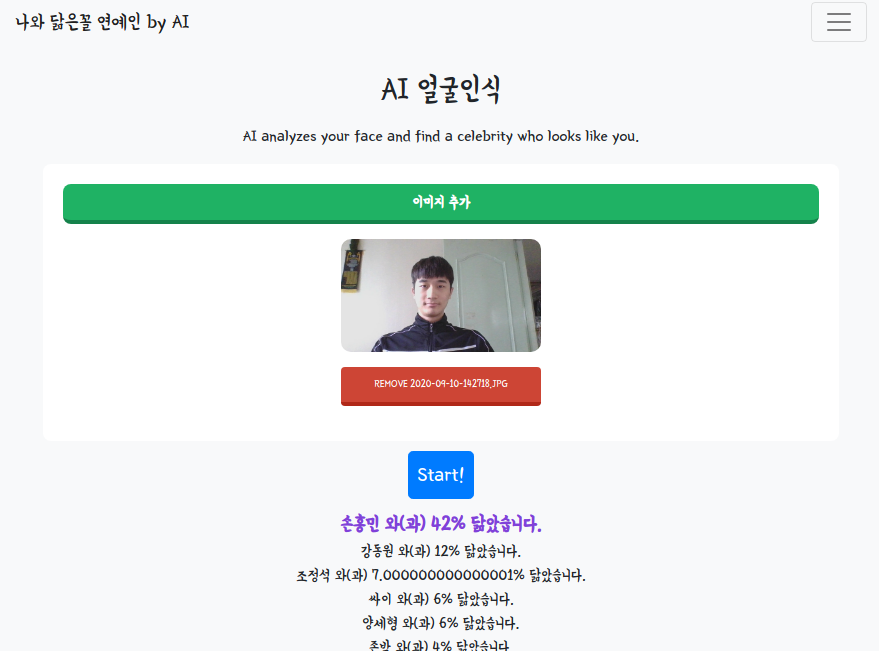
- 첫 번째 순위는 손흥민은 비슷한 결과가 나왔으나 나머지는 .... 기분 좋게 여기서 끝내려 함